# Analiza unigramów, bigramów i trigramów w ksiązce Pozegnanie Jesieni Witkacego

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import nltk
import string
import re

In [2]:
def XML_PARSER(file_path):
    with open(file_path, 'r', encoding="UTF-8") as f:
        xml_file = f.read()
    bs_data = BeautifulSoup(xml_file, 'xml')
    full_text = bs_data.get_text()
    return full_text

In [3]:
pozegnanie_jesieni = "POL0087_witkacy_pozegnanie-jesieni-3.xml"
jedyne_wyjscie = "POL0085_witkacy_jedyne-wyjscie-2.xml"

XML_FILES = [pozegnanie_jesieni, jedyne_wyjscie]

titles = ["Pozegnanie Jesieni", "Jedyne Wyjscie"]

FULL_TEXTS = [] 

data = {"title" : [], "text": []}

for file in XML_FILES:
    full_text = XML_PARSER(file)
    FULL_TEXTS.append(full_text)

for i in range(len(FULL_TEXTS)):
    data['text'].append(FULL_TEXTS[i])
    data['title'].append(titles[i])

df = pd.DataFrame(data=data)
df.head()

,title,text
0,Pozegnanie Jesieni,\n\n\n\nPożegnanie jesieni : ELTeC edition\nWi...
1,Jedyne Wyjscie,\n\n\n\nJedyne wyjście : ELTeC edition\nWitkie...


In [4]:
dane = df['text']
print(dane)

0    \n\n\n\nPożegnanie jesieni : ELTeC edition\nWi...
1    \n\n\n\nJedyne wyjście : ELTeC edition\nWitkie...
Name: text, dtype: object


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

three_gram_vectorizer = CountVectorizer(analyzer='word', ngram_range = (3,3))
pozegnanie_jesieni_3gram = three_gram_vectorizer.fit_transform([dane[1]])

pozegnanie_jesieni_3gram_results = three_gram_vectorizer.get_feature_names_out()


three_gram_vectorizer_2 = CountVectorizer(analyzer='word', ngram_range = (3,3))

jedyne_wyjscie_3gram = three_gram_vectorizer_2.fit_transform([dane[0]])
jedyne_wyjscie_3gram_results = three_gram_vectorizer_2.get_feature_names_out()

print(jedyne_wyjscie_3gram_results)
print(pozegnanie_jesieni_3gram_results)


['10 cm chudy' '10 nikt nie' '128659 cost action' ...
 'żądzę tamtym muśnięciem' 'żądzę żeby się' 'żłopać mogą wszyscy']
['17 letni chłopiec' '1885 1939 34812' '1900 mniej więcej' ...
 'żądańko związał ich' 'żądna już idea' 'żądzy płciowej stosunku']


In [6]:
three_gram_vectorizer_21 = CountVectorizer(analyzer='word', ngram_range = (2,2))
pozegnanie_jesieni_2gram = three_gram_vectorizer_21.fit_transform([dane[1]])

pozegnanie_jesieni_2gram_results = three_gram_vectorizer_21.get_feature_names_out()


three_gram_vectorizer_22 = CountVectorizer(analyzer='word', ngram_range = (2,2))

jedyne_wyjscie_2gram = three_gram_vectorizer_22.fit_transform([dane[0]])
jedyne_wyjscie_2gram_results = three_gram_vectorizer_22.get_feature_names_out()

print(jedyne_wyjscie_2gram_results)
print(pozegnanie_jesieni_2gram_results)

['10 cm' '10 nikt' '128659 cost' ... 'żądzę tamtym' 'żądzę żeby'
 'żłopać mogą']
['17 letni' '1885 1939' '1900 mniej' ... 'żądańko związał' 'żądna już'
 'żądzy płciowej']


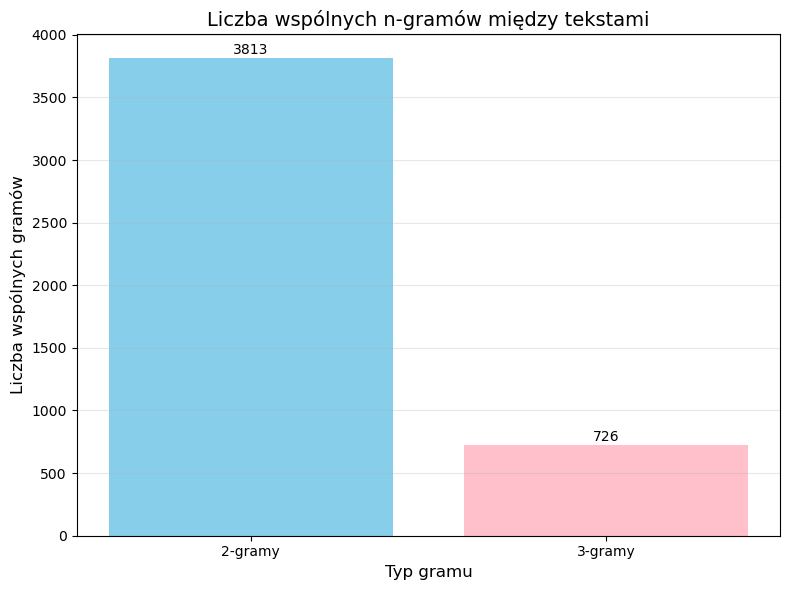

In [7]:
set_jedyne_wyjscie_2gram = set(jedyne_wyjscie_2gram_results)
set_pozegnanie_jesieni_2gram = set(pozegnanie_jesieni_2gram_results)

set_jedyne_wyjscie_3gram = set(jedyne_wyjscie_3gram_results)
set_pozegnanie_jesieni_3gram = set(pozegnanie_jesieni_3gram_results)

common_2grams = set_jedyne_wyjscie_2gram & set_pozegnanie_jesieni_2gram
common_3grams = set_jedyne_wyjscie_3gram & set_pozegnanie_jesieni_3gram

bar1 = len(common_2grams)
bar2 = len(common_3grams)

plt.figure(figsize=(8, 6))
plt.bar(['2-gramy', '3-gramy'], [bar1, bar2], color=["skyblue", 'pink'])
plt.ylabel('Liczba wspólnych gramów', fontsize=12)
plt.xlabel('Typ gramu', fontsize=12)
plt.title('Liczba wspólnych n-gramów między tekstami', fontsize=14)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate([bar1, bar2]):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Częstości 2-gramów

In [8]:
jedyne_wyjscie_2gram_freq = jedyne_wyjscie_2gram.toarray()[0]
pozegnanie_jesieni_2gram_freq = pozegnanie_jesieni_2gram.toarray()[0]

jedyne_wyjscie_2gram_df = pd.DataFrame({
    'gram': jedyne_wyjscie_2gram_results,
    'freq': jedyne_wyjscie_2gram_freq
}).sort_values('freq', ascending=False)

pozegnanie_jesieni_2gram_df = pd.DataFrame({
    'gram': pozegnanie_jesieni_2gram_results,
    'freq': pozegnanie_jesieni_2gram_freq
}).sort_values('freq', ascending=False)

print("10 najczęstszych 2-gramów w 'Jedyne Wyjście':")
print(jedyne_wyjscie_2gram_df.head(10))
print("\n" + "="*60 + "\n")
print("10 najczęstszych 2-gramów w 'Pożegnanie Jesieni':")
print(pozegnanie_jesieni_2gram_df.head(10))

10 najczęstszych 2-gramów w 'Jedyne Wyjście':
             gram  freq
31836      mu się   126
66307     to jest   112
65038  tej chwili   104
57154      się do   103
57468      się na    91
585       ale nie    88
36336    nie było    85
36564      nie ma    84
66432      to nie    79
57508     się nie    71


10 najczęstszych 2-gramów w 'Pożegnanie Jesieni':
              gram  freq
22044      to jest    71
12145       nie ma    44
11122  na przykład    37
15091    po prostu    34
19096       się do    33
22274    to znaczy    33
3476    dla siebie    29
11175       na tle    25
22092       to nie    24
19210       się na    24


# Częstości 3-gramów

In [9]:
jedyne_wyjscie_3gram_freq = jedyne_wyjscie_3gram.toarray()[0]
pozegnanie_jesieni_3gram_freq = pozegnanie_jesieni_3gram.toarray()[0]

jedyne_wyjscie_3gram_df = pd.DataFrame({
    'gram': jedyne_wyjscie_3gram_results,
    'freq': jedyne_wyjscie_3gram_freq
}).sort_values('freq', ascending=False)

pozegnanie_jesieni_3gram_df = pd.DataFrame({
    'gram': pozegnanie_jesieni_3gram_results,
    'freq': pozegnanie_jesieni_3gram_freq
}).sort_values('freq', ascending=False)

print("10 najczęstszych 3-gramów w 'Jedyne Wyjście':")
print(jedyne_wyjscie_3gram_df.head(10))
print("\n" + "="*60 + "\n")
print("10 najczęstszych 3-gramów w 'Pożegnanie Jesieni':")
print(pozegnanie_jesieni_3gram_df.head(10))

10 najczęstszych 3-gramów w 'Jedyne Wyjście':
                    gram  freq
57239    po raz pierwszy    29
45647  nie do zniesienia    17
7228        bądź co bądź    14
97908     zdawało się że    14
47062  nie wiadomo czemu    14
82571        to nie jest    14
69965        się do tego    12
97881     zdawało mu się    11
39226          mu się że    11
84874       ty nie wiesz    11


10 najczęstszych 3-gramów w 'Pożegnanie Jesieni':
                    gram  freq
16675        pe zet pepu    14
2737          co to jest     8
12643       na ten temat     7
13705         nie da się     7
7306     jak na przykład     6
20971    samo dla siebie     5
1479       być nie mogło     5
13835         nie ma ale     5
1888        bądź co bądź     5
20899  samego dla siebie     5


In [10]:
one_gram_vectorizer_2 = CountVectorizer(analyzer='word', ngram_range=(1,1))
pozegnanie_jesieni_1gram = one_gram_vectorizer_2.fit_transform([dane[1]])
pozegnanie_jesieni_1gram_results = one_gram_vectorizer_2.get_feature_names_out()


pozegnanie_jesieni_1gram_freq = pozegnanie_jesieni_1gram.toarray()[0]


dict_pozegnanie_jesieni_1gram = dict(zip(pozegnanie_jesieni_1gram_results, pozegnanie_jesieni_1gram_freq))


words_pj = np.array(list(dict_pozegnanie_jesieni_1gram.keys()))
weights_pj = np.array(list(dict_pozegnanie_jesieni_1gram.values()), dtype=float)
weights_pj = weights_pj / weights_pj.sum() 


In [11]:
losowe_slowa = np.random.choice(words_pj, size=100, p=weights_pj)
print(losowe_slowa)

['chwiejny' 'myślał' 'udawania' 'przedstworzeniowym' 'da' 'dotyków' 'mnie'
 'różnice' 'ich' 'sprzecznością' 'najlepszym' 'zasnute' 'nie' 'ludzkości'
 'coś' 'może' 'bebechami' 'zdają' 'nowego' 'tych' 'sofistów' 'między' 'go'
 'ciągłe' 'swej' 'kres' 'istnienia' 'czasu' 'wyrzekła' 'odskocznię'
 'słabość' 'uczynienie' 'tylko' 'od' 'ma' 'akcentów' 'do' 'tego' 'tylko'
 'artystyczne' 'kondensacji' 'dłużej' 'głowie' 'zastanowić' 'traktowaniem'
 'miłością' 'niepewni' 'dwóch' 'uważał' 'nicości' 'świat' 'lubią'
 'wizgną1' 'przedmiotu' 'po' 'wieczność' 'ludowy' 'własnością' 'jak'
 'musiał' 'potem' 'było' 'chciał' 'ma' 'raczył' 'negatywnego' 'bezmyślnie'
 'bierze' 'sobie' 'tej' 'urzędnika' 'czym' 'czyż' 'dawno' 'nieskończoność'
 'intuicji' 'na' 'statystyczną' 'aby' 'czy' 'wplątać' 'taka' 'może' 'jest'
 'zostaną' 'wypowiedzeń' 'bywały' 'obrażonej' 'jeśli' 'czysto' 'rustalka'
 'rządził' 'nawet' 'potwornym' 'nieskończoność' 'miał' 'osobowości' 'de'
 'co' 'małżeństwa']


In [12]:
def normalize_text(text: str):
    chars_to_remove = string.punctuation
    text = text.translate(str.maketrans('', '', chars_to_remove))
    cleaned_text = re.sub(r"\b\d+[a-z]?\b\.?", "", text)
    cleaned_text = cleaned_text.replace("\n", " ")
    normalized_text = cleaned_text.lower()
    return normalized_text

In [13]:
def string_extra_cleaning(tokens: list):
    # Unicode decimal values of different "-" to remove
    remove_codes = {8211, 8212, 8216, 8217, 8218, 8219, 8220, 8221}
    
    # Characters to remove directly
    remove_chars = {"„", "”", "“", "*"}

    final_tokens = []
    for token in tokens:
        if len(token) == 1:
            if ord(token) not in remove_codes and token not in remove_chars:
                final_tokens.append(token)
        else:
            if token not in remove_chars:
                final_tokens.append(token)

    return final_tokens

In [14]:
df['text'] = df['text'].apply(normalize_text)
df['tokenized_text'] = df['text'].apply(lambda x: nltk.word_tokenize(x))
df['tokenized_text'] = df['tokenized_text'].apply(string_extra_cleaning)

In [15]:
length_of_new_book = len(df['tokenized_text'][1])
new_random_text = np.random.choice(words_pj, size=length_of_new_book, p=weights_pj)
new_book = " ".join(new_random_text)
print(new_book)

pędzie przebiegu twoja czy podstaw idealistów wyższej naiwnego linia przestaje ze zwany świecie ten naszych je przeróbek można problemy ale tam sobie fizyczny określają sprowadzalne nie bezpośrednio terminach poczucie lada przezwycięży jedyny zasnęła wysoki pomogą nade intersubiektywnie samców nietkniętą trwanie fizyka nie już takie tyla szybkości zapach bliski nie samotnego żywego ale tym nie coś stanu kontinuum oporowych może dała związane fizykalnie innego czysto nie związki ci czasu metafizycznych zwrócił oto taki lektury rodzaju wrażenie sobie działać katolickiej formalności sposób zadowolony możemy choćby się tożsamości nie miał nie musimy matematyki dawnym ich wyraźnie zawsze głównie zawsze nie comeliusa mi czasach wielkim te mogło obrachuhku tego idealną itp absolutnej pyknikowi że już tego już za wyrzekanie nie się filozofii wymiarze to po się obecnego rozstrzygnął musi czegoś świat puczymordy może podzielności nam złamie dopiero szczęśliwy jej przyczyniają oka marcel stwór cz

# Porównanie ksiązki stworzonej w wyniku losowania z oryginalną.

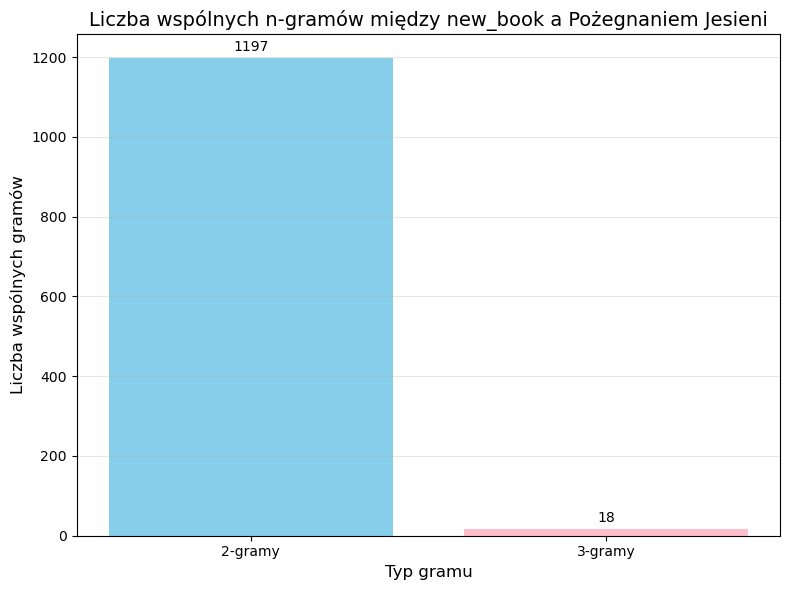

In [16]:
new_book_2gram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(2,2))
new_book_2gram = new_book_2gram_vectorizer.fit_transform([new_book])
new_book_2gram_results = new_book_2gram_vectorizer.get_feature_names_out()

new_book_3gram_vectorizer = CountVectorizer(analyzer='word', ngram_range=(3,3))
new_book_3gram = new_book_3gram_vectorizer.fit_transform([new_book])
new_book_3gram_results = new_book_3gram_vectorizer.get_feature_names_out()


set_new_book_2gram = set(new_book_2gram_results)
set_pozegnanie_jesieni_2gram = set(pozegnanie_jesieni_2gram_results)

set_new_book_3gram = set(new_book_3gram_results)
set_pozegnanie_jesieni_3gram = set(pozegnanie_jesieni_3gram_results)

common_2grams = set_new_book_2gram & set_pozegnanie_jesieni_2gram
common_3grams = set_new_book_3gram & set_pozegnanie_jesieni_3gram

bar1 = len(common_2grams)
bar2 = len(common_3grams)

plt.figure(figsize=(8, 6))
plt.bar(['2-gramy', '3-gramy'], [bar1, bar2], color=["skyblue", 'pink'])
plt.ylabel('Liczba wspólnych gramów', fontsize=12)
plt.xlabel('Typ gramu', fontsize=12)
plt.title('Liczba wspólnych n-gramów między new_book a Pożegnaniem Jesieni', fontsize=14)
plt.grid(axis='y', alpha=0.3)

for i, v in enumerate([bar1, bar2]):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()